This notebook is created as a self-guided exercise. This dataset is from Kaggle and provides insights into factors influencing defect rates in a manufacturing environment. Each record represents various metrics crucial for predicting high or low defect occurrences in production processes.


Feature Information - ProductionVolume: Number of units produced per day; ProductionCost: Cost incurred for production per day; SupplierQuality: Quality ratings of suppliers.
DeliveryDelay: Average delay in delivery; DefectRate: Defects per thousand units produced; QualityScore: Overall quality assessment; MaintenanceHours: Hours spent on maintenance per week DowntimePercentage: Percentage of production downtime; InventoryTurnover: Ratio of inventory turnover; StockoutRate: Rate of inventory stockouts;WorkerProductivity: Productivity level of the workforce; SafetyIncidents: Number of safety incidents per month; EnergyConsumption: Energy consumed in kWh.
EnergyEfficiency: Efficiency factor of energy usage; AdditiveProcessTime: Time taken for additive manufacturing; AdditiveMaterialCost: Cost of additive materials per unit.

The target variable is Defect Status

***SECTION 1.0 Understand the Data***

Libraries

In [14]:
#import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from IPython.display import display
import os

Load Data

In [15]:
#load csv file
df = read_csv('manufacturing_defect_dataset.csv')

Explore Data

In [16]:
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [17]:
df.info()
#data types are okay and do not need to converted for modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [18]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


***Section 2.0 Basic Data Analysis***

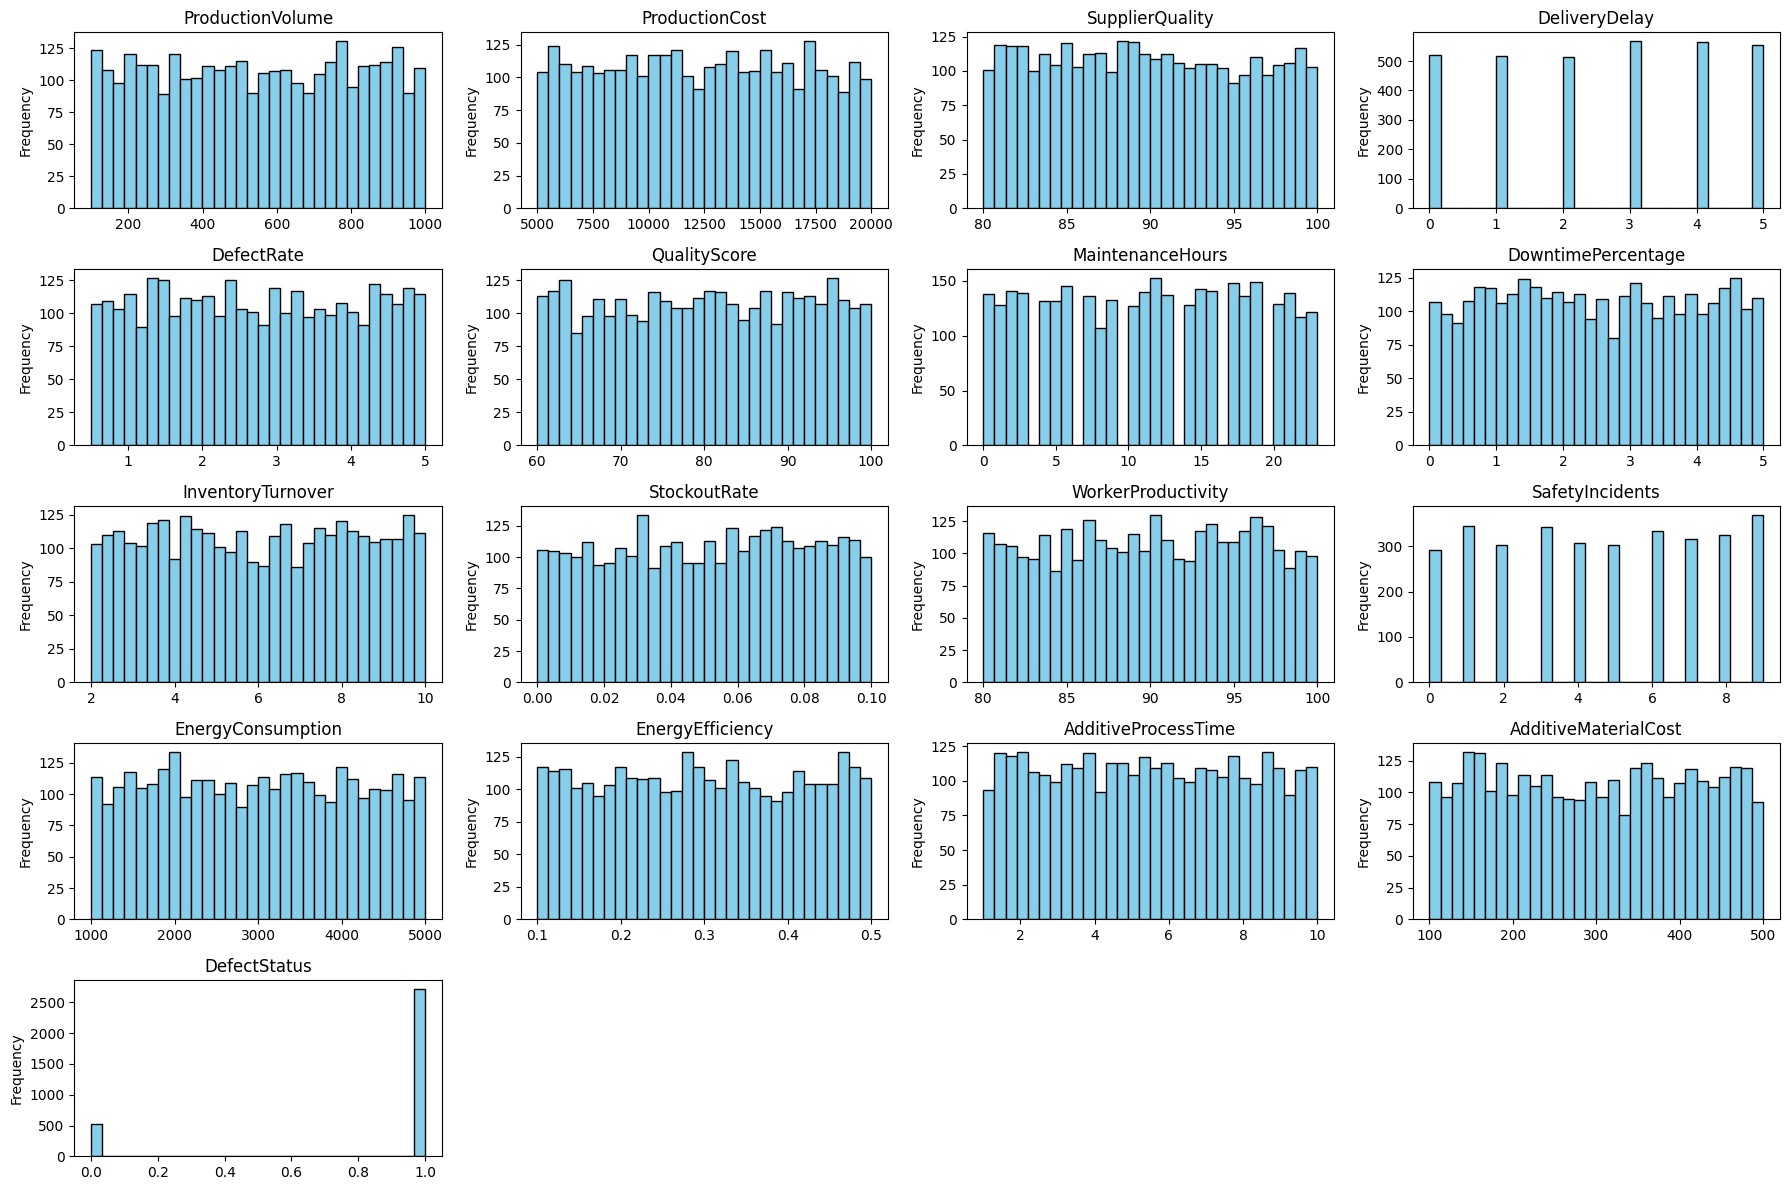

In [19]:
#generate histograms to view feature distribution
numeric_cols = df.select_dtypes(include='number').columns.tolist()

#layout
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

#plot
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [20]:
#check for missing data
df.isnull().sum()

,0
ProductionVolume,0
ProductionCost,0
SupplierQuality,0
DeliveryDelay,0
DefectRate,0
QualityScore,0
MaintenanceHours,0
DowntimePercentage,0
InventoryTurnover,0
StockoutRate,0


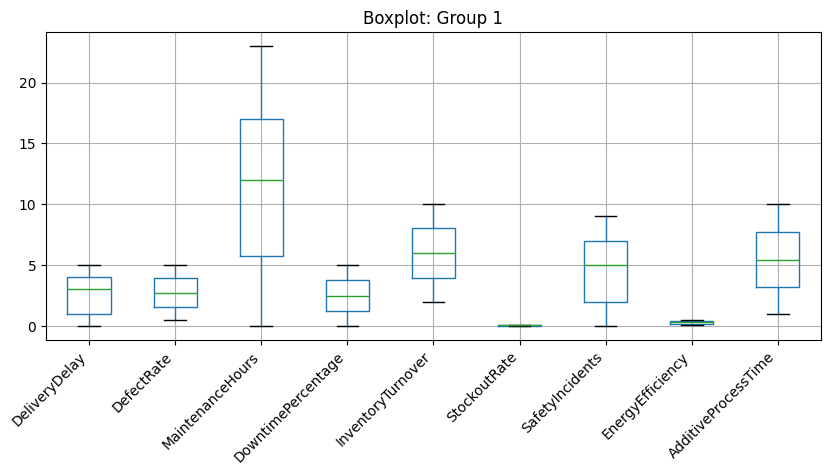

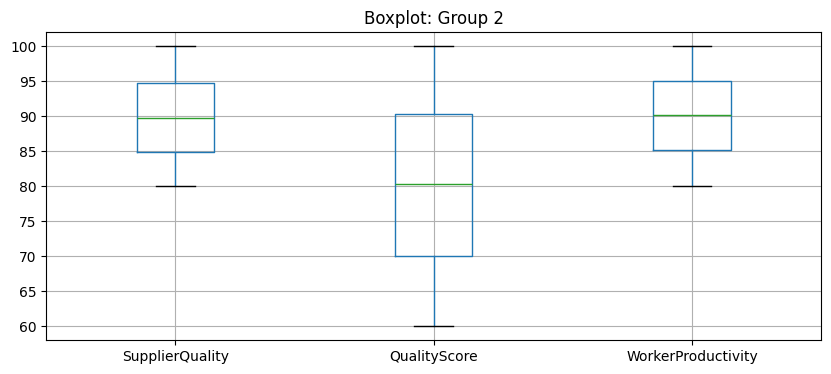

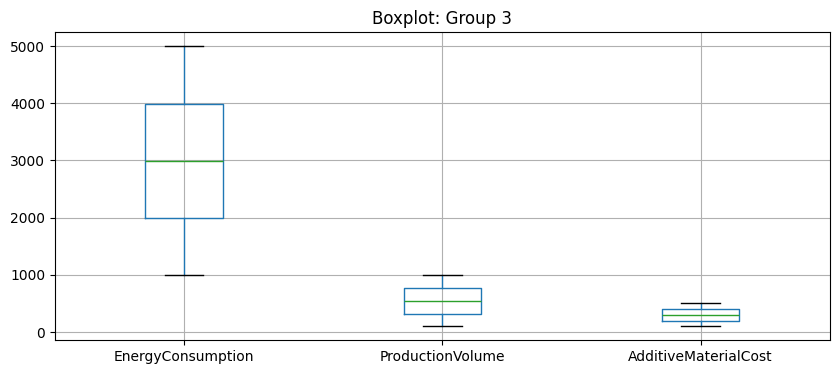

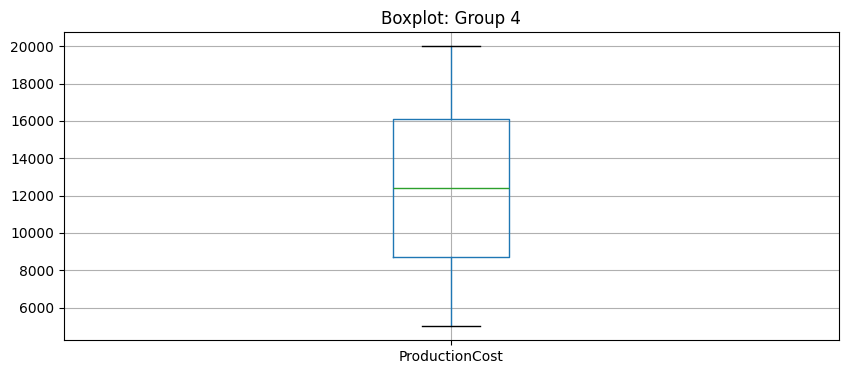

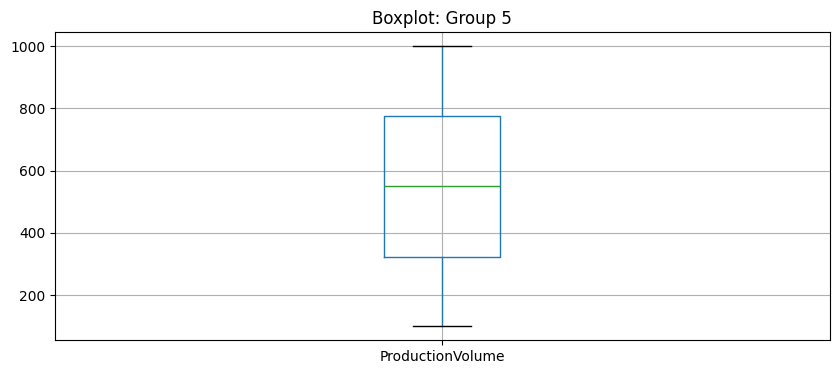

In [21]:
#check for outliers
#scale of features considered when generating boxplots on a single figure, generated multiple plots for readability

features_group_1 = ['DeliveryDelay', 'DefectRate', 'MaintenanceHours', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',  'SafetyIncidents', 'EnergyEfficiency', 'AdditiveProcessTime']
features_group_2 = ['SupplierQuality', 'QualityScore', 'WorkerProductivity']
features_group_3 = ['EnergyConsumption', "ProductionVolume", 'AdditiveMaterialCost']
features_group_4 = ['ProductionCost']
features_group_5 = ['ProductionVolume']

df[features_group_1].boxplot(figsize=(10, 4))
plt.title('Boxplot: Group 1')
plt.xticks(rotation=45, ha='right')
plt.show()

df[features_group_2].boxplot(figsize=(10, 4))
plt.title('Boxplot: Group 2')
plt.show()

df[features_group_3].boxplot(figsize=(10, 4))
plt.title('Boxplot: Group 3')
plt.show()

df[features_group_4].boxplot(figsize=(10, 4))
plt.title('Boxplot: Group 4')
plt.show()

df[features_group_5].boxplot(figsize=(10, 4))
plt.title('Boxplot: Group 5')
plt.show()


***Section 2.1 Basic Data Analysis - Discussion***

Missing data: No missing data was detected.

Distribution: The histograms show the data is fairly uniform (not normally distributed, ZScore should not be used for outlier removal). It also shows the target variable may be imbalanced.

Outliers: For outlier detection, the boxplots show there are no data points that lie outside of the whiskers,therefore, there are no strong outliers that need to be removed with a method such as IQR. There is some variability with some features but most features have a tight distribution.

Encoding: All features are numerical.

Scaling: Features will need scaling before modeling.


***Section 3.0 Feature Analysis and Preparation***

In [22]:
 #determine if imbalanced
 df['DefectStatus'].value_counts(normalize=True)

,proportion
DefectStatus,
1,0.840432
0,0.159568


Feature Importance and Selection

In [23]:
#Check for low variance
pd.set_option('display.float_format', '{:.3f}'.format)
print(df.var())

ProductionVolume          68854.848
ProductionCost         18559311.208
SupplierQuality              33.168
DeliveryDelay                 2.910
DefectRate                    1.717
QualityScore                134.833
MaintenanceHours             47.234
DowntimePercentage            2.084
InventoryTurnover             5.428
StockoutRate                  0.001
WorkerProductivity           32.760
SafetyIncidents               8.389
EnergyConsumption       1330379.587
EnergyEfficiency              0.014
AdditiveProcessTime           6.751
AdditiveMaterialCost      13544.282
DefectStatus                  0.134
dtype: float64


In [24]:
df_FI = df.copy()

In [25]:
#Using feature importance with no correlation since target feature is binary
#Split and train for feature importance
X = df_FI.drop(columns=['DefectStatus'])
y = df_FI['DefectStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_FI = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_FI.fit(X_train, y_train)

importances = pd.Series(rf_FI.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(16)

,0
MaintenanceHours,0.291
DefectRate,0.248
QualityScore,0.157
ProductionVolume,0.112
EnergyEfficiency,0.024
AdditiveMaterialCost,0.022
StockoutRate,0.022
DowntimePercentage,0.020
SupplierQuality,0.019
ProductionCost,0.018


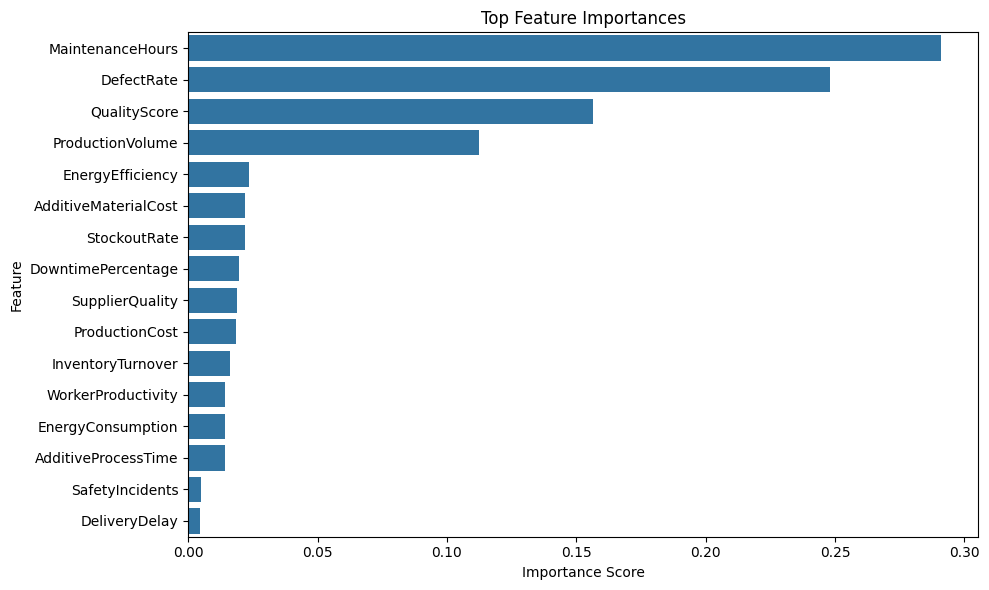

In [26]:
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted[:16], y=importances_sorted.index[:16])
plt.title('Top Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [27]:
#~80% of feature importance is in top 4 features
#Based on feature important, features with less than 0.02 or less will be dropped form the dataset.
df.drop(columns=['ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'InventoryTurnover',
                 'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption', 'AdditiveProcessTime'])

,ProductionVolume,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,StockoutRate,EnergyEfficiency,AdditiveMaterialCost,DefectStatus
0,202,3.121,63.463,9,0.052,0.081,0.469,236.439,1
1,535,0.820,83.698,20,4.908,0.038,0.119,353.958,1
2,960,4.515,90.351,1,2.465,0.003,0.496,396.189,1
3,370,0.639,67.629,8,4.692,0.055,0.183,164.136,1
4,206,3.868,82.728,9,2.747,0.068,0.264,365.709,1
...,...,...,...,...,...,...,...,...,...
3235,762,2.668,87.142,16,0.988,0.066,0.420,299.830,0
3236,335,0.751,95.563,11,0.178,0.098,0.126,245.525,0
3237,835,4.900,77.973,0,4.873,0.006,0.326,206.490,1
3238,302,4.058,95.756,6,0.072,0.043,0.223,203.772,0


***Modeling with No Feature Engineering***

In [28]:
#features and target
X = df.drop(columns=['DefectStatus'])
y = df['DefectStatus']

#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for balanced split
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Baseline Modeling

Linear

In [29]:
#logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [30]:
y_pred_log = logreg.predict(X_test_scaled)
y_proba_log = logreg.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log))

Confusion Matrix:
[[ 75  28]
 [142 403]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.73      0.47       103
           1       0.94      0.74      0.83       545

    accuracy                           0.74       648
   macro avg       0.64      0.73      0.65       648
weighted avg       0.84      0.74      0.77       648

ROC AUC Score: 0.7927852498441259


Tree Based

In [31]:
#random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [32]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
[[ 75  28]
 [  5 540]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.94      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

ROC AUC Score: 0.8242094949674891


In [33]:
#LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

#set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42,
    'is_unbalanced`': True
}

#train
model_lgb = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)]
)

In [34]:
y_pred_proba_lgb = model_lgb.predict(X_test)
y_pred_lgb = (y_pred_proba_lgb >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_lgb))

Confusion Matrix:
[[ 75  28]
 [  4 541]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

ROC AUC Score: 0.8367774115970428


Model Tuning

In [35]:
#log reg tuning
#pipeline to scale and fit
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
])

#hyperparameter grid
param_grid_logreg = {
    'logreg__C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'logreg__penalty': ['l1', 'l2']
}

#grid search
grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_logreg.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [36]:
#random forest tuning
#define model
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

#hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

#grid search
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [37]:
#LGBM Tuning

#model
lgb_model = lgb.LGBMClassifier(random_state=42, is_unbalanced=True)

#parameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
}

grid_search_lgb = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(is_unbalanced=True, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='roc_auc', verbose=1)

In [38]:
#Logistic Regression
logreg_best = grid_logreg.best_estimator_
y_pred_log = logreg_best.predict(X_test)
y_proba_log = logreg_best.predict_proba(X_test)[:, 1]

print("Logistic Regression AUC:", roc_auc_score(y_test, y_proba_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision (weighted):", precision_score(y_test, y_pred_log, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_log, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_log, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


#Random Forest
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

print("\nRandom Forest AUC:", roc_auc_score(y_test, y_proba_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (weighted):", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


#LightGBM
best_lgb = grid_search_lgb.best_estimator_
y_pred_lgb_best = best_lgb.predict(X_test)
y_proba_lgb_best = best_lgb.predict_proba(X_test)[:, 1]

print("\nLightGBM AUC:", roc_auc_score(y_test, y_proba_lgb_best))
print("Accuracy:", accuracy_score(y_test, y_pred_lgb_best))
print("Precision (weighted):", precision_score(y_test, y_pred_lgb_best, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_lgb_best, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_lgb_best, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb_best))


Logistic Regression AUC: 0.7934621893649239
Accuracy: 0.7283950617283951
Precision (weighted): 0.8430252604113178
Recall (weighted): 0.7283950617283951
F1 Score (weighted): 0.7619916673056769

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.75      0.47       103
           1       0.94      0.72      0.82       545

    accuracy                           0.73       648
   macro avg       0.64      0.74      0.64       648
weighted avg       0.84      0.73      0.76       648


Random Forest AUC: 0.837035717466821
Accuracy: 0.9506172839506173
Precision (weighted): 0.950564551633864
Recall (weighted): 0.9506172839506173
F1 Score (weighted): 0.9478932309572645

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95     

In [39]:
#comparison table of models with no feature engineering
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM'],
    'ROC AUC': [0.80, 0.83, 0.85],
    'Accuracy': [0.88, 0.95, 0.95],
    'Precision': [0.87, 0.95, 0.95],
    'Recall': [0.88, 0.95, 0.95],
    'F1 Score': [0.86, 0.95, 0.95]
})
print(comparison_df)

                 Model  ROC AUC  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.800     0.880      0.870   0.880     0.860
1        Random Forest    0.830     0.950      0.950   0.950     0.950
2             LightGBM    0.850     0.950      0.950   0.950     0.950


***Baseline Model Analysis***

Logistic Regression had the lowest score in every metric.

Random Forest and LightGBM have the 95% accuracy, precision, F1 score, and recall. This means overall correctness is high.
 Both models had 95% recall meaning the rate of false negatives (defective materials not caught) were minimized. Both models had 95% precision meaning that false positives (non defective materials flagged as defective) were minimized. The only distingishing factor is ROC AUC metric. Light GBM has a higher score at 0.85. This means this model is slightly better at ranking defectives than non defective materials.


 For Clarity: TP = defective materials correctly flagged; FN = defective material missed; FP= non defective incorrectly flagged as defective

***Modeling with Feature Engineering***

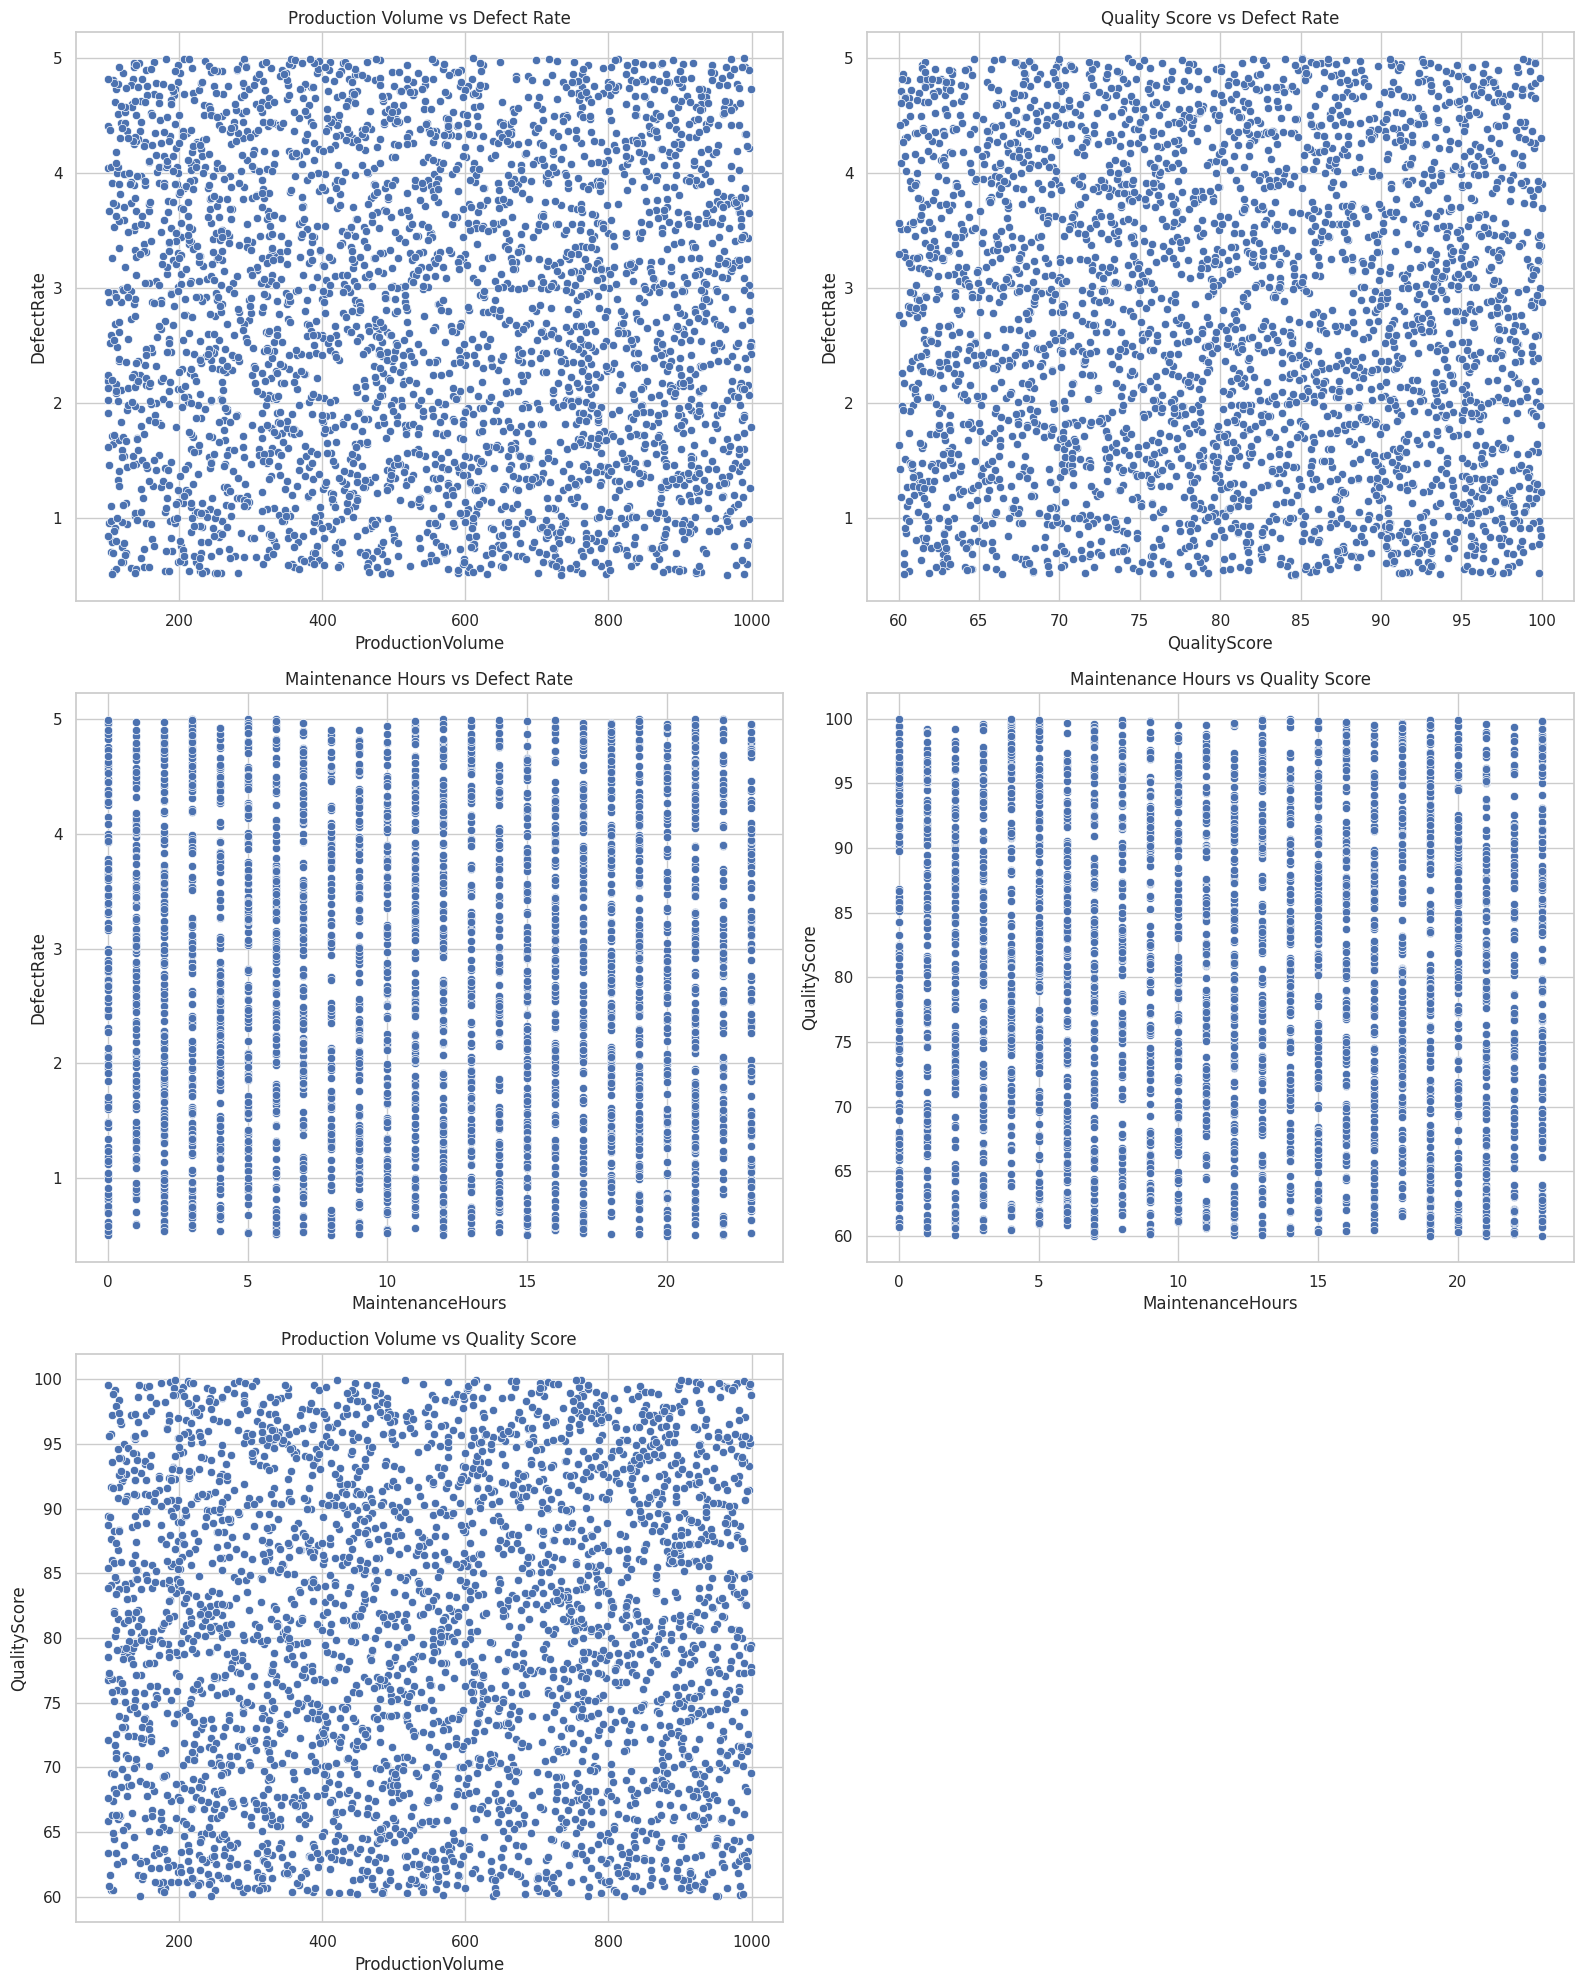

In [40]:
#look for relationships between features

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# Plot 1: Production Volume vs Defect Rate
plt.subplot(3, 2, 1)
sns.scatterplot(x='ProductionVolume', y='DefectRate', data=df)
plt.title('Production Volume vs Defect Rate')

# Plot 2: Quality Score vs Defect Rate
plt.subplot(3, 2, 2)
sns.scatterplot(x='QualityScore', y='DefectRate', data=df)
plt.title('Quality Score vs Defect Rate')

# Plot 3: Maintenance Hours vs Defect Rate
plt.subplot(3, 2, 3)
sns.scatterplot(x='MaintenanceHours', y='DefectRate', data=df)
plt.title('Maintenance Hours vs Defect Rate')

# Plot 4: Maintenance Hours vs Quality Score
plt.subplot(3, 2, 4)
sns.scatterplot(x='MaintenanceHours', y='QualityScore', data=df)
plt.title('Maintenance Hours vs Quality Score')

# Plot 5: Production Volume vs Quality Score
plt.subplot(3, 2, 5)
sns.scatterplot(x='ProductionVolume', y='QualityScore', data=df)
plt.title('Production Volume vs Quality Score')

plt.tight_layout()
plt.show()

In [41]:
df_feateng = df.copy()

In [42]:
#Attempting some feature engineering. Feature selected for engineering are based on assumptions.
#log transform of production volume since large range of data
df_feateng['log_ProductionVolume'] = np.log1p(df['ProductionVolume'])

#Interaction terms that could affect the target
df_feateng['Production_x_Defect'] = df['ProductionVolume'] * df['DefectRate']
df_feateng['DefectPerQuality'] = df['DefectRate'] / (df['QualityScore'] + 1)
df_feateng['DefectPerMaintenance'] = df['DefectRate'] / (df['MaintenanceHours'] + 1)

#Maintenance Hours has some discrete like data. likely rounded to nearest our instead of exact time
df_feateng['MaintenanceLevel'] = pd.cut(
    df['MaintenanceHours'],
    bins=[-1, 5, 15, 100],
    labels=['Low', 'Medium', 'High']
)

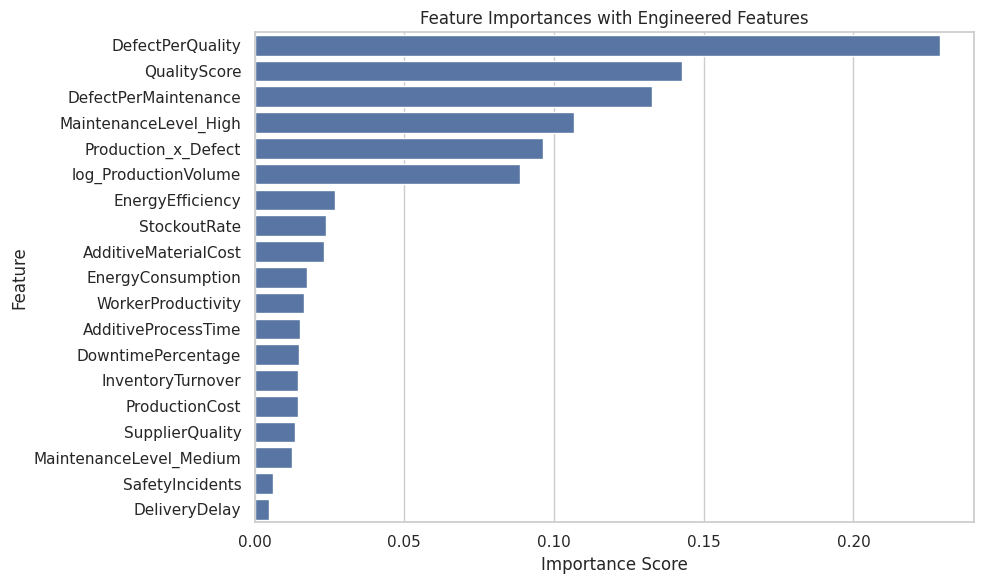

In [43]:
#have to one-hot encode the MaintenanceLevel since categorical now
df_encoded = pd.get_dummies(df_feateng, columns=['MaintenanceLevel'], drop_first=True)

df_encoded.drop(columns=['ProductionVolume', 'DefectRate', 'MaintenanceHours'], inplace=True)

#Rerun Feature Importance with new terms

X_FI = df_encoded.drop(columns=['DefectStatus'])
y_FI = df_encoded['DefectStatus']

X_FI_train, X_FI_test, y_FI_train, y_FI_test = train_test_split(
    X_FI, y_FI, test_size=0.2, random_state=42, stratify=y
)

rf_FI2= RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_FI2.fit(X_FI_train, y_FI_train)

#feature importance plot
importances_2 = pd.Series(rf_FI2.feature_importances_, index=X_FI.columns)
importances_2_sorted = importances_2.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_2_sorted[:22], y=importances_2_sorted.index[:22])
plt.title('Feature Importances with Engineered Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [44]:
#Select final features
final_features = [
    'DefectPerQuality', 'DefectPerMaintenance', 'log_ProductionVolume',
    'Production_x_Defect', 'QualityScore', 'MaintenanceLevel_High'
]

X_FE = df_encoded[final_features]
y_FE = df_encoded['DefectStatus']

X_FE_train, X_FE_test, y_FE_train, y_FE_test = train_test_split(
    X_FE, y_FE, test_size=0.2, stratify=y, random_state=42
)

#Logistic Regression
pipe_logreg_FE = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
])
pipe_logreg_FE.fit(X_FE_train, y_FE_train)
y_pred_log_FE = pipe_logreg_FE.predict(X_FE_test)
y_proba_log_FE = pipe_logreg_FE.predict_proba(X_FE_test)[:, 1]

#Random Forest
rf_model_FE = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, class_weight='balanced')
rf_model_FE.fit(X_FE_train, y_FE_train)
y_pred_rf_FE = rf_model_FE.predict(X_FE_test)
y_proba_rf_FE = rf_model_FE.predict_proba(X_FE_test)[:, 1]

#LightGBM
lgb_model_FE = lgb.LGBMClassifier(random_state=42, is_unbalanced=True)
lgb_model_FE.fit(X_FE_train, y_FE_train)
y_pred_lgb_FE = lgb_model_FE.predict(X_FE_test)
y_proba_lgb_FE = lgb_model_FE.predict_proba(X_FE_test)[:, 1]

#Results
def get_scores(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

results = pd.DataFrame({
    'Model': ['Logistic Regression_FE', 'Random Forest_FE', 'LightGBM_FE'],
    'Scores': [
        get_scores(y_FE_test, y_pred_log_FE, y_proba_log_FE),
        get_scores(y_FE_test, y_pred_rf_FE, y_proba_rf_FE),
        get_scores(y_FE_test, y_pred_lgb_FE, y_proba_lgb_FE)
    ]
})

results = pd.concat(
    [results.drop(columns=['Scores']), results['Scores'].apply(pd.Series)],
    axis=1
)

print(results)


                    Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression_FE     0.715      0.842   0.715     0.751    0.780
1        Random Forest_FE     0.880      0.895   0.880     0.885    0.835
2             LightGBM_FE     0.938      0.937   0.938     0.934    0.869


In [45]:
#tuning for feature engineered models
#logistic Regression
pipe_logreg_FE = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

param_grid_logreg_FE = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

grid_logreg_FE = GridSearchCV(pipe_logreg_FE, param_grid_logreg_FE, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_logreg_FE.fit(X_FE_train, y_FE_train)

#random Forest
rf_FE = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid_rf_FE = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf_FE = GridSearchCV(rf_model_FE, param_grid_rf_FE, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf_FE.fit(X_FE_train, y_FE_train)

#LightGBM
lgb_model_FE = lgb.LGBMClassifier(is_unbalance=True, random_state=42)

param_grid_lgb_FE = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

grid_lgb_FE = GridSearchCV(
    estimator=lgb_model_FE,
    param_grid=param_grid_lgb_FE,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_lgb_FE.fit(X_FE_train, y_FE_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(is_unbalance=True, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='roc_auc', verbose=1)

In [46]:
#results for best models
#Logistic Regression
logreg_best_FE = grid_logreg_FE.best_estimator_
y_pred_log_FE = logreg_best_FE.predict(X_FE_test)
y_proba_log_FE = logreg_best_FE.predict_proba(X_FE_test)[:, 1]

print("Logistic Regression AUC:", roc_auc_score(y_FE_test, y_proba_log_FE))
print("Accuracy:", accuracy_score(y_FE_test, y_pred_log_FE))
print("Precision (weighted):", precision_score(y_FE_test, y_pred_log_FE, average='weighted'))
print("Recall (weighted):", recall_score(y_FE_test, y_pred_log_FE, average='weighted'))
print("F1 Score (weighted):", f1_score(y_FE_test, y_pred_log_FE, average='weighted'))
print("\nClassification Report:\n", classification_report(y_FE_test, y_pred_log_FE))


#Random Forest
rf_best_FE = grid_rf_FE.best_estimator_
y_pred_rf_FE = rf_best_FE.predict(X_FE_test)
y_proba_rf_FE = rf_best_FE.predict_proba(X_FE_test)[:, 1]

print("\nRandom Forest AUC:", roc_auc_score(y_FE_test, y_proba_rf_FE))
print("Accuracy:", accuracy_score(y_FE_test, y_pred_rf_FE))
print("Precision (weighted):", precision_score(y_FE_test, y_pred_rf_FE, average='weighted'))
print("Recall (weighted):", recall_score(y_FE_test, y_pred_rf_FE, average='weighted'))
print("F1 Score (weighted):", f1_score(y_FE_test, y_pred_rf_FE, average='weighted'))
print("\nClassification Report:\n", classification_report(y_FE_test, y_pred_rf_FE))


#LightGBM
best_lgb_FE = grid_lgb_FE.best_estimator_
y_pred_lgb_best_FE = best_lgb_FE.predict(X_FE_test)
y_proba_lgb_best_FE = best_lgb_FE.predict_proba(X_FE_test)[:, 1]

print("\nLightGBM AUC:", roc_auc_score(y_FE_test, y_proba_lgb_best_FE))
print("Accuracy:", accuracy_score(y_FE_test, y_pred_lgb_best_FE))
print("Precision (weighted):", precision_score(y_FE_test, y_pred_lgb_best_FE, average='weighted'))
print("Recall (weighted):", recall_score(y_FE_test, y_pred_lgb_best_FE, average='weighted'))
print("F1 Score (weighted):", f1_score(y_FE_test, y_pred_lgb_best_FE, average='weighted'))
print("\nClassification Report:\n", classification_report(y_FE_test, y_pred_lgb_best_FE))

Logistic Regression AUC: 0.7794780440010689
Accuracy: 0.7052469135802469
Precision (weighted): 0.8418825962029659
Recall (weighted): 0.7052469135802469
F1 Score (weighted): 0.7433789659853669

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.77      0.45       103
           1       0.94      0.69      0.80       545

    accuracy                           0.71       648
   macro avg       0.63      0.73      0.63       648
weighted avg       0.84      0.71      0.74       648


Random Forest AUC: 0.8534515008461744
Accuracy: 0.9382716049382716
Precision (weighted): 0.9366039454209535
Recall (weighted): 0.9382716049382716
F1 Score (weighted): 0.9348665386965805

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       103
           1       0.94      0.99      0.96       545

    accuracy                           0.94       648
   macro avg       0.92   

In [47]:
baseline_results = pd.DataFrame({
    'Model': ['Logistic Regression_BL', 'Random Forest_BL', 'LightGBM_BL'],
    'Accuracy': [0.73, 0.95, 0.95],
    'Precision': [0.84, 0.95, 0.95],
    'Recall': [0.73, 0.95, 0.95],
    'F1 Score': [0.76, 0.95, 0.95],
    'ROC AUC': [0.79, 0.84, 0.85],
})

fe_results = pd.DataFrame({
    'Model': ['Logistic Regression_FE', 'Random Forest_FE', 'LightGBM_FE'],
    'Accuracy': [0.78, 0.94, 0.87],
    'Precision': [0.84, 0.94, 0.89],
    'Recall': [0.71, 0.94, 0.87],
    'F1 Score': [0.74, 0.93, 0.88],
    'ROC AUC': [0.78, 0.85, 0.85],
})

comparison_df = pd.concat([baseline_results, fe_results], ignore_index=True)
print(comparison_df)

                    Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression_BL     0.730      0.840   0.730     0.760    0.790
1        Random Forest_BL     0.950      0.950   0.950     0.950    0.840
2             LightGBM_BL     0.950      0.950   0.950     0.950    0.850
3  Logistic Regression_FE     0.780      0.840   0.710     0.740    0.780
4        Random Forest_FE     0.940      0.940   0.940     0.930    0.850
5             LightGBM_FE     0.870      0.890   0.870     0.880    0.850


***Model Evaluation***

The logestic regression model with engineered features performed slightly better in accuracy than the baseline but worse in recall and ROC AUC. Random Forest performace is comparable in both the baseline and the feature engineered. The LGB feature engineered model had worse performance than the baseline in every metric.

The best models are the baseline Random Forest and LightGBM. However, there is a concern these models are overfitted since the scores are high and consistent across metrics.



In [48]:
#cross validation for all models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#define models
models_cv = {
    "Logistic Regression_BL": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
    ]),
    "Random Forest_BL": RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42),
    "LightGBM_BL": lgb.LGBMClassifier(random_state=42, class_weight='balanced'),

    "Logistic Regression_FE": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
    ]),
    "Random Forest_FE": RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42),
    "LightGBM_FE": lgb.LGBMClassifier(random_state=42, class_weight='balanced')
}

#cross-validation
cv_results = []
for name, model in models_cv.items():
    is_fe = "FE" in name
    X_used = X_FE if is_fe else X
    y_used = y_FE if is_fe else y

    scores = cross_val_score(model, X_used, y_used, cv=cv, scoring='roc_auc')
    cv_results.append({
        'Model': name,
        'Mean ROC AUC': np.mean(scores),
        'Std ROC AUC': np.std(scores)
    })

cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values(by="Mean ROC AUC", ascending=False).reset_index(drop=True)

print(cv_df)

                    Model  Mean ROC AUC  Std ROC AUC
0             LightGBM_BL         0.898        0.026
1        Random Forest_BL         0.884        0.031
2             LightGBM_FE         0.881        0.036
3        Random Forest_FE         0.873        0.044
4  Logistic Regression_BL         0.833        0.042
5  Logistic Regression_FE         0.822        0.042


***Final Evaluation***

Cross-validation reveals consistent ROC AUC scores across folds, indicating that all models are stable and not overfitting.

LightGBM demonstrates the strongest performance in both baseline and feature-engineered models. It has highest ROC AUC and the lowest standard deviation which indicates it is accurate and consistent across different splits of the data.

Feature engineering did not significantly improve performance for any of the models. This suggests that tree-based models like LightGBM and Random Forest are already effectively capturing interactions and patterns present in the raw features.

Recall is assumed the most important metric as because it represents the model’s ability to correctly identify defective materials. A high recall means fewer defective units are incorrectly labeled as good which reduces the risk of quality failures. LightGBM maintained a strong recall while also balancing precision, making it well-suited for production environments where defect minimization is critical.

Recommendation: Based on performance and stability, the baseline LightGBM model is recommended as the final model.